In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Cleaning Pre Merge

In [76]:
import pandas as pd

# Read the Fake CSV file
fake_df = pd.read_csv("Fake.csv")

# Read the True CSV file
real_df = pd.read_csv("True.csv")

# Add a new column called Class with a value of Fake = 1 , True = 0
fake_df['class'] = 1
real_df['class'] = 0

print(fake_df.isna().sum())
print(real_df.isna().sum())
print(fake_df.head())
print(real_df.head())

title      0
text       0
subject    0
date       0
class      0
dtype: int64
title      0
text       0
subject    0
date       0
class      0
dtype: int64
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  class  
0  December 31, 2017      1  
1  December 31, 2017      1  
2  December 30, 2017      1  
3 

Note that in our dataset, all real news articles were scraped from Reuters, an Engish news agency company. Since all Reuters articles begin with the phrase "XXX (Reuters)", where XXX refers to the country the article is based on, we need to delete this part from our text data as failing to do so may lead to severe overfitting in the models we train later on. 

One important caveat - even though we deleted (Reuters) which addresses the source prior to beginning the article, content of the article itself may still contain the word Reuters. However, we will not remove Reuters here because it forms part of the article content. Examples of sentences with the words Reuters in our data can be found below. 

Examples 

1. Lawyers for Papadopoulos did not immediately respond to requests by Reuters for comment. 
2. Moore has denied wrongdoing and Reuters has not been able to independently verify the allegations.

In [77]:
def index_filter(text, substring):
    index_one = text.find(substring)
    return (index_one-1) + len(substring) + 2

In [ ]:
lst = real_df['text']
for i in range(len(lst)):
    if "(Reuters)" in lst[i]:
        index = index_filter(lst[i], "(Reuters)")
        new_text = lst[i][index + 2:]
        real_df.at[i, 'text'] = new_text
    else:
        pass 

In [78]:
real_df

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [79]:
# Drop Duplicates when both column exist in other rows

fake_df_dupesdropped = fake_df.drop_duplicates(subset=['title','text'],keep="first")

len(fake_df_dupesdropped)

17908

In [80]:
real_df_dupesdropped = real_df.drop_duplicates(subset=['title','text'],keep="first")

len(real_df_dupesdropped)

21197

### Data Merger

In [81]:
# Merge the two csv [True and Fake]
merged_df = pd.concat([fake_df_dupesdropped, real_df_dupesdropped], ignore_index=True)

# Save the merged dataframe to a new CSV file
#merged_df.to_csv("merged_news.csv", index=False)


# Have to clean the Fake Dataset, a few of the rows are broken. 10 Rows in the Fake dataset is broken for the Title and Text
# The dates in Fake Dataset also need to be clean, some are shorten form date , some are full formatted 

## Data Cleaning Post Merge

In [82]:
merged_df

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
39100,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
39101,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
39102,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
39103,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [83]:
# Convert Date column into Dates, this is because some of the data in the date column have shorten form
"""
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')  
# If they are improper dates, it will be NAT (Not a time)

na_date_rows = merged_df[merged_df['date'].isna()]

print(na_date_rows['date']) # Rows that do not have a published date.
"""


"\nmerged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')  \n# If they are improper dates, it will be NAT (Not a time)\n\nna_date_rows = merged_df[merged_df['date'].isna()]\n\nprint(na_date_rows['date']) # Rows that do not have a published date.\n"

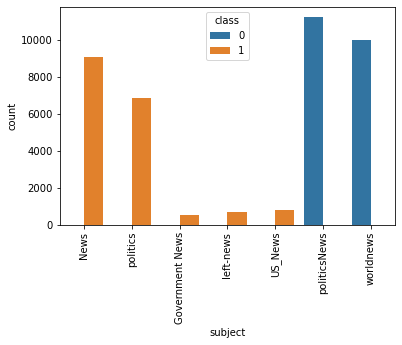

In [84]:

# We might have to clean the Subject column

sns.countplot(x='subject',hue='class',data=merged_df) 
plt.xticks(rotation=90) 

plt.show() 
# From the chart, we can realize that each csv had their own way of categorizing the subject, 
# hence it might not be accurate in to re-label them, hence we would be dropping the subject
# We would also be doing topic modelling, hence we will be using our own topics.

In [85]:
# Things to drop before creaeting a new csv

data = merged_df.dropna()
data.drop(columns=['subject','date'])

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
39100,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
39101,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
39102,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
39103,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


### Data Transformaton / Processing

#### NLTK Processing , Count words etc

In [87]:
#remove stopwords in the text for NER EDA
stop = stopwords.words('english')
data['text_without_stopwords'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['title_without_stopwords'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [88]:
# Write the newly cleaned dataframe in new file
data.to_csv("merged_cleaned.csv", index=False) # Final Dataset